In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats

In [160]:
file_path = "raw_data/Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [161]:
df.shape

(1552210, 44)

In [162]:
df.Patient_ID.value_counts()

Patient_ID
18469     336
113190    336
4905      336
101922    336
116439    336
         ... 
115587      8
116503      8
111396      8
10209       8
114977      8
Name: count, Length: 40336, dtype: int64

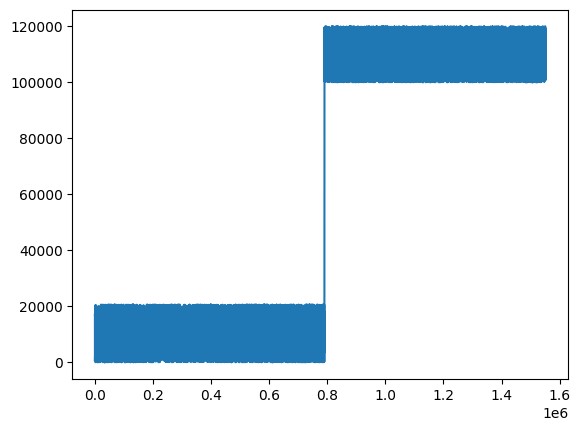

In [163]:
plt.plot(df.Patient_ID)

In [164]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit2               0.394251
Unit1               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

In [165]:
features = df.columns.tolist()
features

['Unnamed: 0',
 'Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_ID']

In [166]:
#features to drop in the dataset

columns_drop = ['Unnamed: 0','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2']

columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','Age','Gender','Patient_ID','SepsisLabel']

In [167]:
df1 = df[columns_for_baseline]
df1.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,68.54,0,17072,0


In [168]:
df_filled = df1.bfill().ffill()
df1.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,68.54,0,17072,0
5,5,62.0,100.0,NaN,124.0,85.00,61.0,14.0,NaN,68.54,0,17072,0
6,6,61.0,100.0,NaN,101.0,75.00,58.0,14.0,NaN,68.54,0,17072,0
7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,NaN,68.54,0,17072,0
8,8,71.0,100.0,NaN,121.0,74.00,91.0,14.0,NaN,68.54,0,17072,0
9,9,69.0,100.0,NaN,120.0,79.00,98.0,14.0,NaN,68.54,0,17072,0


In [169]:
(df_filled.isnull().sum()/len(df_filled)).sort_values(ascending=False)

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
DBP            0.0
Resp           0.0
EtCO2          0.0
Age            0.0
Gender         0.0
Patient_ID     0.0
SepsisLabel    0.0
dtype: float64

In [170]:
df_filled['Gender'] = df_filled['Gender'].map({0: 'Female', 1: 'Male'})

In [171]:
df_encoded = pd.get_dummies(df_filled, columns=['Gender'], prefix='Gender')

# Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

In [172]:
df_encoded['Gender_Female'].value_counts()

Gender_Female
0    868103
1    684107
Name: count, dtype: int64

In [173]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

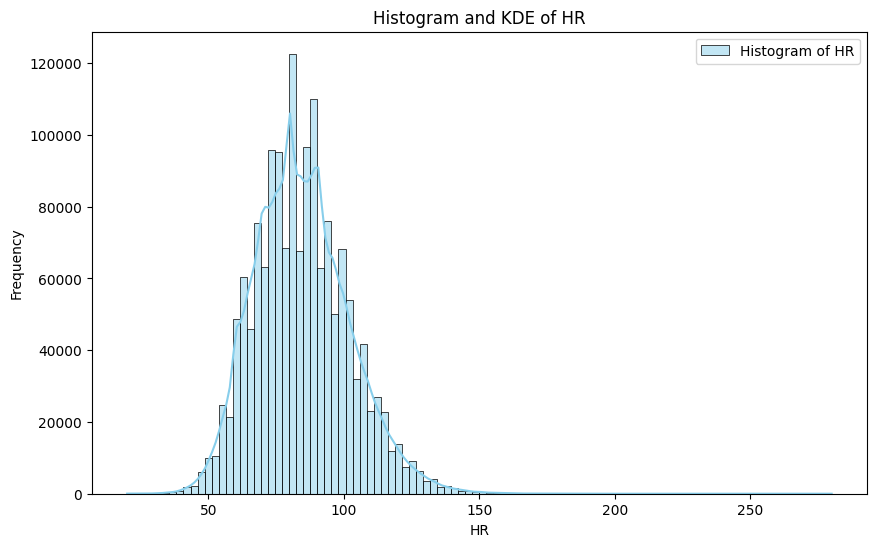

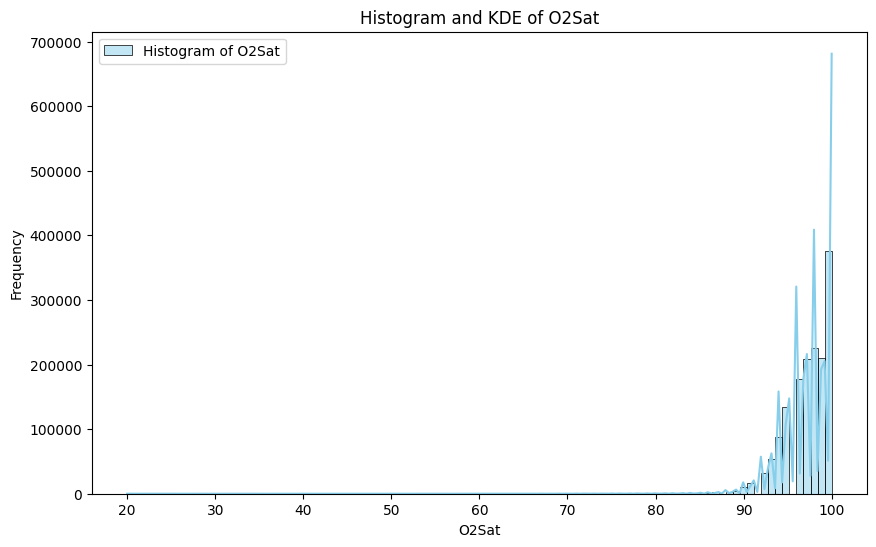

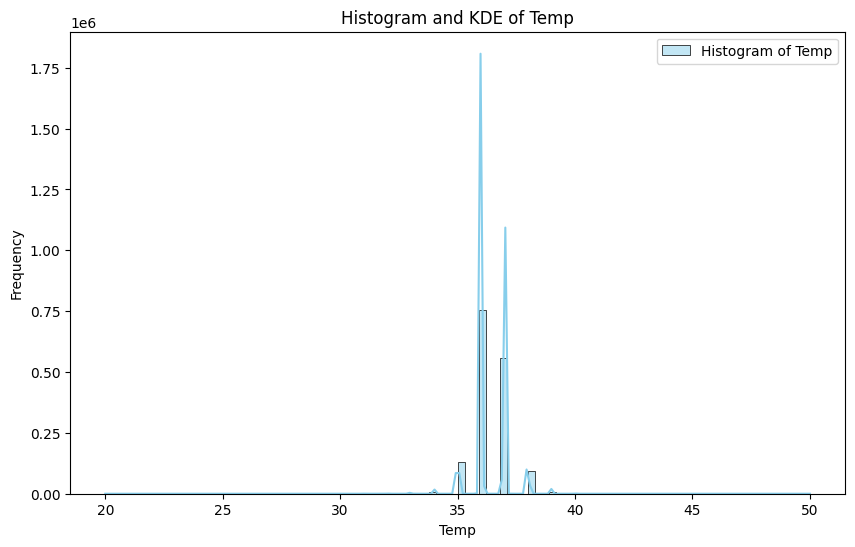

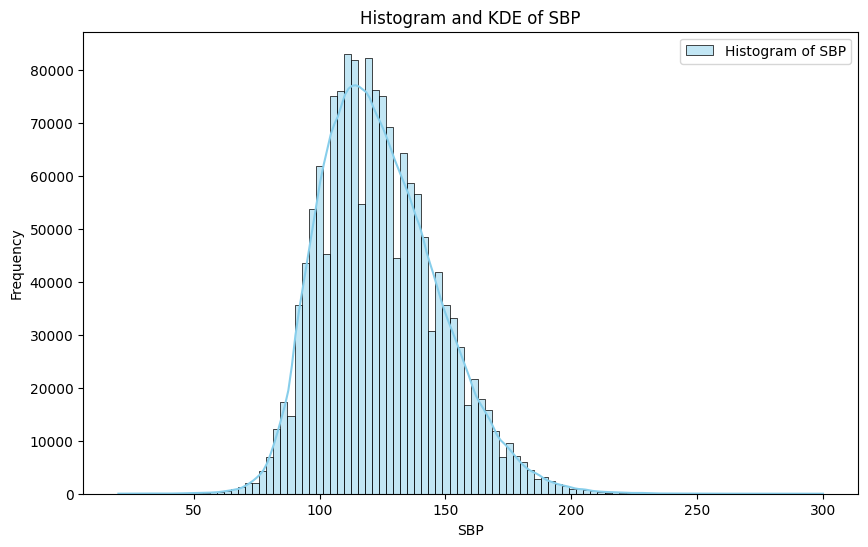

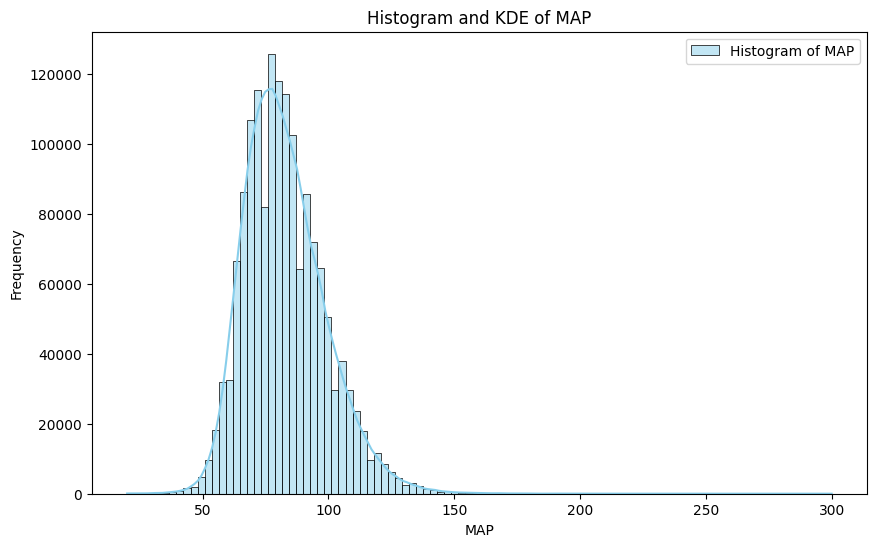

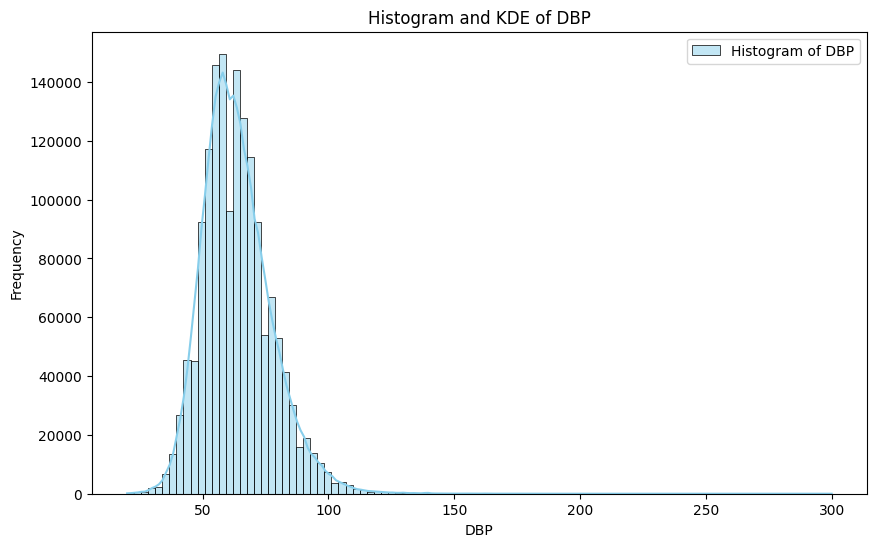

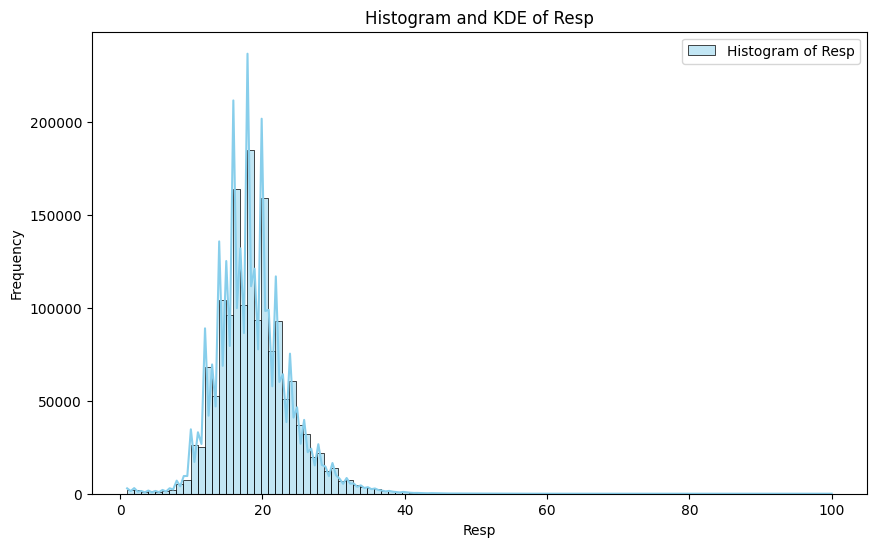

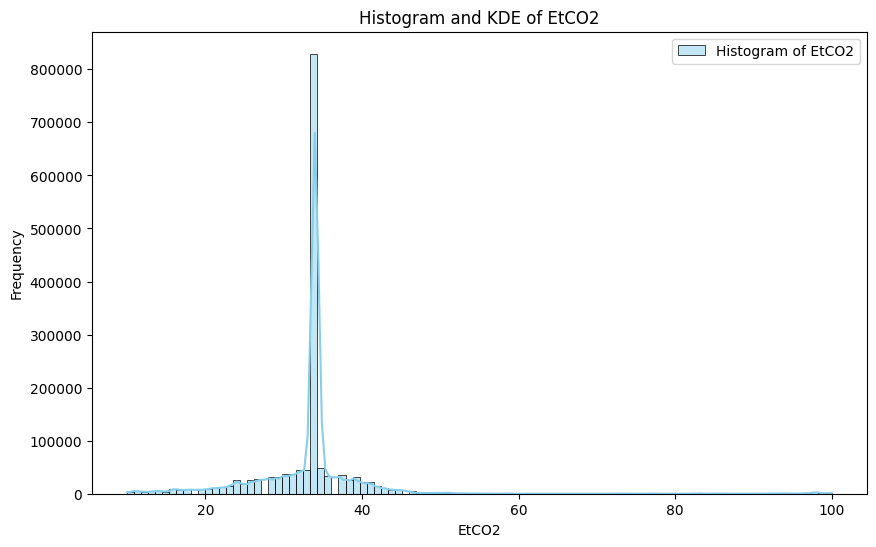

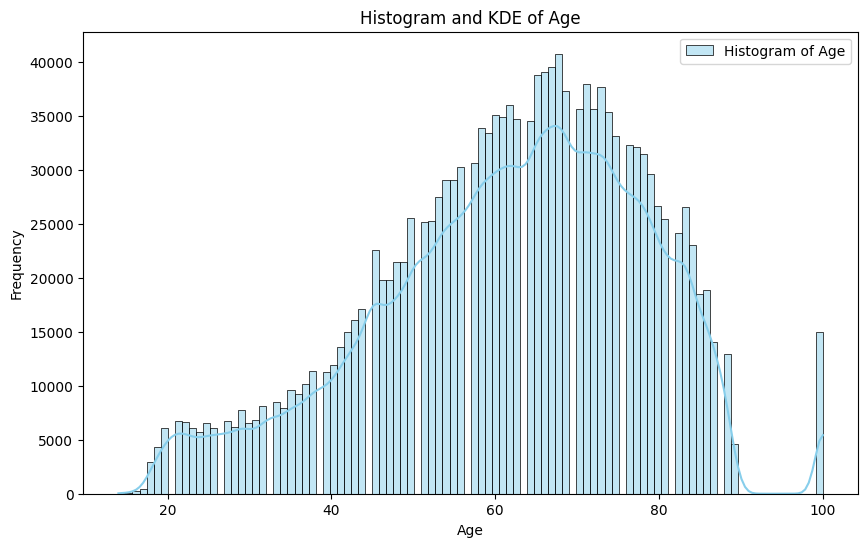

In [174]:
# List of columns to plot
columns_to_scale = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'Age']

# Plot histograms with KDE for each variable
for column in columns_to_scale:
    plt.figure(figsize=(10, 6))

    # Create histogram with KDE for the variable
    sns.histplot(df_encoded[column], kde=True, bins=100, color='skyblue', label=f'Histogram of {column}')

    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram and KDE of {column}')
    plt.legend()
    plt.show()

# After checking the histograms we can see that:

-'HR' has normal distribution

-'O2Sat' is not normal and is squeeed to the right

-'Temp' is normal

-'SBP' is normal

-'MAP' is normal

-'DBP' is normal

-'Resp' is normal

-'EtCO2' is weird

-'Age' is normal squeeded to the right

In [175]:
df_encoded.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Patient_ID,SepsisLabel,Gender_Female,Gender_Male
0,0,65,100,35,129,72,69,16,34,68,17072,0,1,0
1,1,65,100,35,129,72,69,16,34,68,17072,0,1,0
2,2,78,100,35,129,42,69,17,34,68,17072,0,1,0
3,3,73,100,35,129,74,69,17,34,68,17072,0,1,0
4,4,70,100,35,129,74,69,14,34,68,17072,0,1,0
5,5,62,100,35,124,85,61,14,34,68,17072,0,1,0
6,6,61,100,35,101,75,58,14,34,68,17072,0,1,0
7,7,68,100,35,142,93,78,16,34,68,17072,0,1,0
8,8,71,100,36,121,74,91,14,34,68,17072,0,1,0
9,9,69,100,36,120,79,98,14,34,68,17072,0,1,0


In [176]:
# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
df_encoded['O2Sat'] = min_max_scaler.fit_transform(df_encoded[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
df_encoded[columns_to_standardize] = standard_scaler.fit_transform(df_encoded[columns_to_standardize])

In [177]:
df_encoded.tail(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Patient_ID,SepsisLabel,Gender_Female,Gender_Male
1552160,11,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,0.268971,1.151615,0.198094,105149,0,1,0
1552161,12,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,0.268971,1.151615,0.198094,105149,0,1,0
1552162,13,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,0.268971,1.151615,0.198094,105149,0,1,0
1552163,14,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,0.268971,1.151615,0.198094,105149,0,1,0
1552164,15,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,-1.284492,1.151615,0.198094,105149,0,1,0
1552165,16,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,-1.284492,1.151615,0.198094,105149,0,1,0
1552166,17,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,-1.284492,1.151615,0.198094,105149,0,1,0
1552167,0,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,-1.284492,1.151615,0.137020,112699,0,0,1
1552168,1,-1.175230,1.0000,-0.505601,0.304972,-0.712677,-0.992669,-1.284492,1.151615,0.137020,112699,0,0,1
1552169,2,-0.369671,0.9625,-1.780895,0.004446,-0.773474,-0.920246,-1.672857,1.151615,0.137020,112699,0,0,1


In [178]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

In [179]:
sepsis_patients_ids = list(set(df_encoded.loc[df_encoded['SepsisLabel'] == 1, 'Patient_ID'].tolist()))


In [180]:
len(sepsis_patients_ids)

2932

In [181]:
nonsepsis_patients_ids = list(set(df_encoded.loc[df_encoded['SepsisLabel'] ==0, 'Patient_ID'].tolist()))

In [182]:
len(nonsepsis_patients_ids)

39910

In [184]:
groups_with_all_nonsepsis = df_encoded.groupby('Patient_ID')['SepsisLabel'].sum() == 0
nonsepsis_patient_ids = groups_with_all_nonsepsis[groups_with_all_nonsepsis].index.tolist()
len(nonsepsis_patient_ids)

37404

In [185]:
groups_with_all_sepsis = df_encoded.groupby('Patient_ID')['SepsisLabel'].sum()

# Filter to get only those groups where the sum is not equal to zero
sepsis_patient_ids = groups_with_all_sepsis[groups_with_all_sepsis != 0]

len(sepsis_patient_ids)

2932

In [186]:
import random

random_patient_id = random.sample(nonsepsis_patient_ids, 3241)
random_patient_id

[8908,
 7693,
 115700,
 2364,
 2112,
 118371,
 15251,
 18032,
 105524,
 109651,
 4915,
 117887,
 13184,
 10589,
 102583,
 119498,
 100181,
 3868,
 105674,
 4954,
 17908,
 111260,
 111571,
 107965,
 115494,
 2328,
 116011,
 536,
 17734,
 9223,
 5163,
 116596,
 119381,
 19391,
 12674,
 11230,
 10851,
 118750,
 7862,
 6004,
 110718,
 11677,
 19472,
 104057,
 105353,
 117879,
 3757,
 15195,
 116986,
 116029,
 110440,
 12841,
 117410,
 104941,
 103463,
 113123,
 13792,
 18116,
 100616,
 116393,
 100340,
 4535,
 112778,
 3434,
 106854,
 100869,
 116041,
 103271,
 115823,
 108691,
 116834,
 101339,
 110198,
 5952,
 18549,
 52,
 17637,
 114782,
 110977,
 3795,
 109346,
 103950,
 117105,
 100820,
 17878,
 118017,
 3211,
 11903,
 12475,
 118398,
 104162,
 13933,
 115732,
 102285,
 109091,
 106241,
 7679,
 6145,
 3309,
 106141,
 17970,
 6107,
 108366,
 102680,
 102482,
 16,
 1195,
 111373,
 8070,
 100310,
 116148,
 5363,
 13423,
 113130,
 100980,
 117483,
 118707,
 102458,
 109442,
 114973,
 1382

In [214]:
random_nonsepsis_df = df_encoded[df_encoded['Patient_ID'].isin(random_patient_id)]
random_nonsepsis_df.shape


(119257, 14)

In [215]:

sepsis_df = df_encoded[df_encoded['Patient_ID'].isin(sepsis_patient_ids)]
sepsis_df.shape

(489, 14)

In [189]:
combined_df = pd.concat([random_nonsepsis_df, sepsis_df], ignore_index=True)
combined_df.sort_values(by=['Patient_ID', 'Hour'], inplace=True)
# Print the first few rows to verify
combined_df.describe()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Patient_ID,SepsisLabel,Gender_Female,Gender_Male
count,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000,119746.000000
mean,21.829915,-0.026557,0.964237,-0.018300,0.023231,0.014204,-0.001940,-0.028719,0.016445,-0.012081,59197.419580,0.000084,0.430996,0.569004
std,21.837378,0.989585,0.038399,0.977717,0.997449,1.003178,1.017225,0.979690,1.054120,1.019271,50396.697739,0.009138,0.495218,0.495218
min,0.000000,-3.706984,0.012500,-13.258536,-4.460504,-3.813338,-3.165335,-3.420502,-3.044509,-2.672411,1.000000,0.000000,0.000000,0.000000
25%,9.000000,-0.714911,0.950000,-0.505601,-0.682469,-0.712677,-0.702980,-0.701943,-0.028545,-0.656950,9942.000000,0.000000,0.000000,0.000000
50%,18.000000,-0.139512,0.975000,-0.505601,-0.081418,-0.104704,-0.123602,-0.119395,0.102584,0.137020,19927.000000,0.000000,0.000000,1.000000
75%,31.000000,0.608507,0.987500,0.769692,0.648430,0.564067,0.600620,0.463154,0.102584,0.747766,110439.000000,0.000000,1.000000,1.000000
max,335.000000,6.592655,1.000000,5.870866,6.358414,13.209903,13.057240,15.803595,8.757091,2.335705,119993.000000,1.000000,1.000000,1.000000


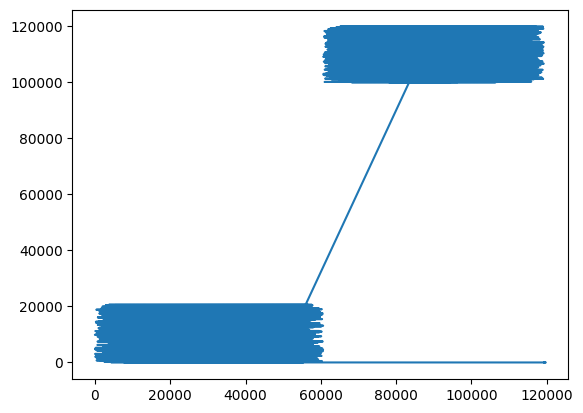

In [190]:
plt.plot(combined_df.Patient_ID)

In [191]:
combined_df.iloc[300:350]

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Patient_ID,SepsisLabel,Gender_Female,Gender_Male
119447,44,0.723587,0.9500,0.769692,-0.467808,-1.016663,-0.847824,1.045702,0.102584,-2.12274,9,0,0,1
119448,45,0.953746,0.9375,0.769692,0.390836,-0.712677,-0.775402,-0.507760,0.102584,-2.12274,9,0,0,1
119449,46,0.953746,0.9750,0.769692,-0.854198,-1.381447,-1.354780,0.657336,0.102584,-2.12274,9,0,0,1
119450,47,1.011286,0.9750,0.769692,-1.068859,-1.381447,-1.282357,-0.313578,0.102584,-2.12274,9,0,0,1
119451,48,1.126366,0.9750,0.769692,-0.811266,-1.320649,-1.209935,-0.313578,0.102584,-2.12274,9,0,0,1
119452,49,1.126366,0.9750,0.769692,-0.381943,-0.895068,-1.065091,-0.119395,0.102584,-2.12274,9,0,0,1
119453,50,1.356525,0.9500,0.769692,-0.510740,-1.199055,-1.354780,1.434068,0.102584,-2.12274,9,0,0,1
119454,51,1.183906,0.9625,0.769692,-0.768333,-1.259852,-1.282357,1.239885,0.102584,-2.12274,9,0,0,1
119455,52,1.183906,0.9625,0.769692,-0.811266,-1.138258,-1.137513,-0.701943,0.102584,-2.12274,9,0,0,1
119456,53,1.241445,0.9750,0.769692,-0.940062,-1.259852,-1.209935,0.074788,0.102584,-2.12274,9,0,0,1


In [192]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119746 entries, 119309 to 68725
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Hour           119746 non-null  int64  
 1   HR             119746 non-null  float64
 2   O2Sat          119746 non-null  float64
 3   Temp           119746 non-null  float64
 4   SBP            119746 non-null  float64
 5   MAP            119746 non-null  float64
 6   DBP            119746 non-null  float64
 7   Resp           119746 non-null  float64
 8   EtCO2          119746 non-null  float64
 9   Age            119746 non-null  float64
 10  Patient_ID     119746 non-null  int64  
 11  SepsisLabel    119746 non-null  int64  
 12  Gender_Female  119746 non-null  int64  
 13  Gender_Male    119746 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.7 MB


In [193]:
combined_df['Gender'] = combined_df.apply(lambda row: 0 if row['Gender_Female'] == 1 else 1, axis=1)

# Drop the old Gender_Female and Gender_Male columns
combined_df.drop(columns=['Gender_Female', 'Gender_Male'], inplace=True)
combined_df.head()


,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Patient_ID,SepsisLabel,Gender
119309,0,0.723587,0.9375,-0.505601,-1.111791,-0.469487,-0.558135,0.074788,0.102584,1.297437,1,0,0
119310,1,0.723587,0.9375,-0.505601,-1.111791,-0.469487,-0.558135,0.074788,0.102584,1.297437,1,0,0
119311,2,0.263267,0.9875,-0.505601,-0.081418,0.199283,-0.558135,0.657336,0.102584,1.297437,1,0,0
119312,3,0.320807,0.9375,-0.505601,-0.081418,0.503269,-0.558135,2.210799,0.102584,1.297437,1,0,0
119313,4,1.068826,0.8500,-0.505601,-0.081418,0.503269,-0.558135,1.045702,0.102584,1.297437,1,0,0


In [213]:
combined_df.shape


(119746, 12)

In [200]:
unique_patient_ids = combined_df.index.nunique()
unique_patient_ids

3249

In [201]:
combined_df.shape

(119746, 12)

In [212]:
X = combined_df.drop(columns = ["SepsisLabel"])
y = combined_df['SepsisLabel']

# Split the data into training and testing sets
split_point = int(0.8 * unique_patient_ids)  # 80% train, 20% test

# Split unique Patient IDs into training and testing sets
train_ids = unique_patient_ids[:split_point]
test_ids = unique_patient_ids[split_point:]

train_data = combined_df[combined_df['Patient_ID'].isin(train_ids)]
test_data = combined_df[combined_df['Patient_ID'].isin(test_ids)]

print(f"Shape of training data: {train_data.shape}")
print(f"Shape of testing data: {test_data.shape}")

TypeError: 'int' object is not subscriptable